# Test clean parameter 

To see if the cleaning is causing some issues with the spectra.



In [1]:
import os
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt

In [2]:
# Chip number
chip = 2

# Nod file names
names = ["CRIRE.2012-07-12T06:54:44.372_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T06:58:20.691_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:01:49.683_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:05:30.660_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:08:59.651_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:12:39.576_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:16:06.773_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:19:47.498_{0}.nod.ms.fits".format(chip),
]


In [3]:
#LOAD IN THE NOT CLEANED SPECTRA

data_path = "/home/jneal/BD-DRACS/HD202206-1-copy_to_find_artifacts/no-clean/"

no_clean_data = []
for name in names:
    data = fits.getdata(os.path.join(data_path, name))
    no_clean_data.append(data)


In [4]:
# LOAD IN THE CLEANED SPECTRA
data_path = "/home/jneal/BD-DRACS/HD202206-1-copy_to_find_artifacts/yes-clean/"

yes_clean_data = []
for name in names:
    data = fits.getdata(os.path.join(data_path, name))
    yes_clean_data.append(data)

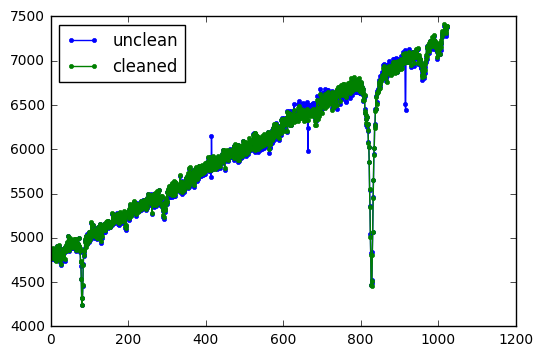

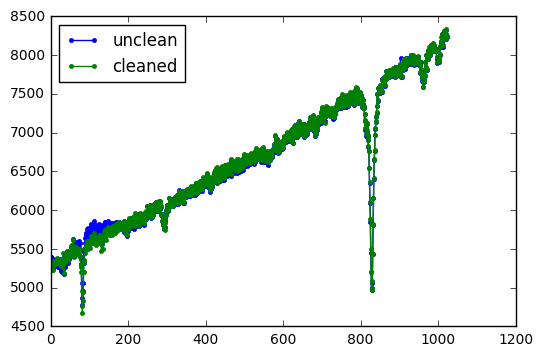

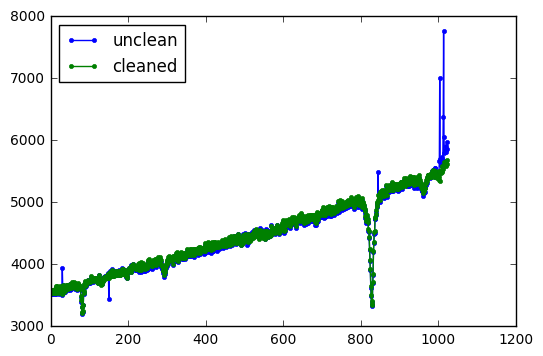

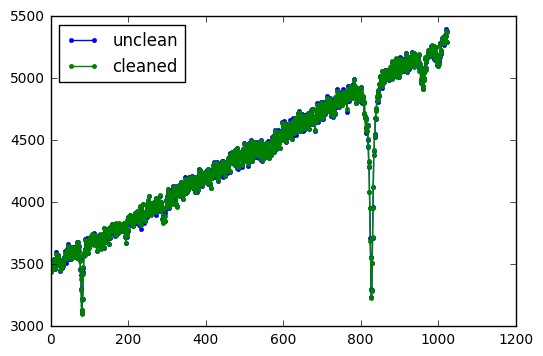

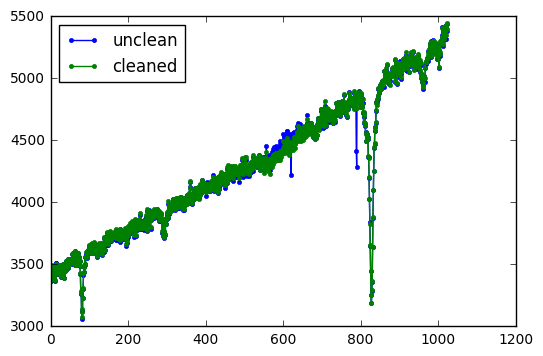

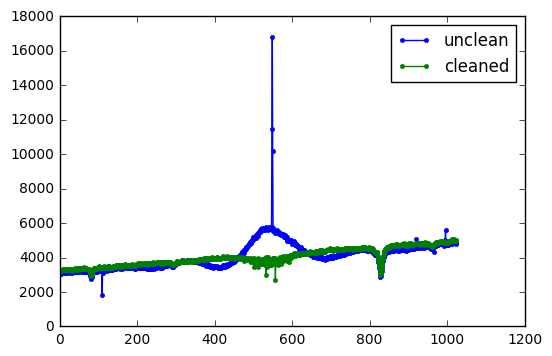

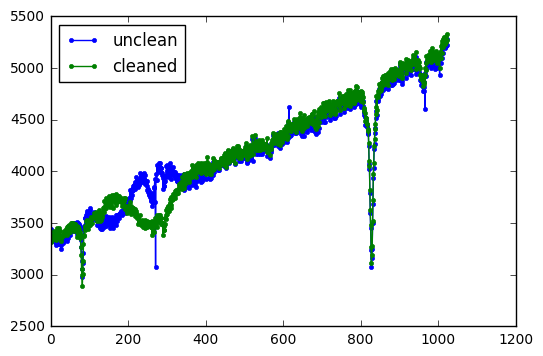

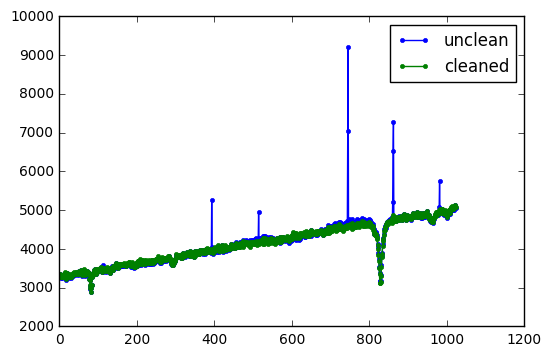

In [5]:
# Plotting some results

for unclean, clean in zip(no_clean_data, yes_clean_data):
    plt.plot(unclean, ".-", label="unclean")
    plt.plot(clean, ".-", label="cleaned")
    plt.legend(loc=0)
    #plt.ylim([np.min(clean), np.max(clean)])
    plt.show()



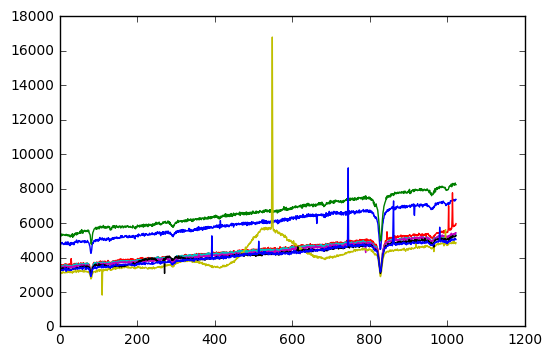

In [6]:
# PlOT ALL UNCLEAN
for data in no_clean_data:
    plt.plot(data)
plt.show()

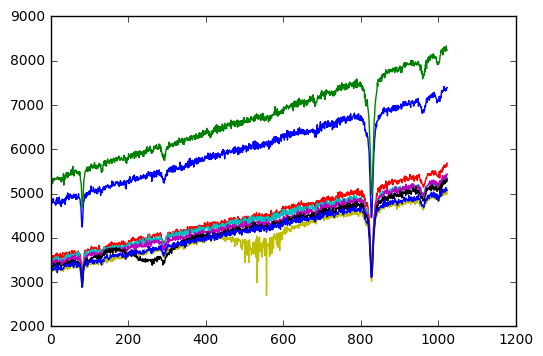

In [7]:
# PlOT ALL UNCLEAN
for data in yes_clean_data:
    plt.plot(data)
plt.show()

In [8]:
# Combined dracs
dracs_flux = fits.getdata("/home/jneal/BD-DRACS/HD202206-1/Combined_Nods/CRIRE.2012-07-12T06-54-44.372_2.nod.ms.norm.sum.fits")


In [9]:
# Find Gasgano Spectra as a comparison

name = "/home/jneal/BD-DRACS/../Gasgano-BDs/HD202206-1/Reduced/crires_spec_jitter_extracted_0001.fits"

data = fits.getdata(name,2)
data.columns
wl = data["Wavelength"]
flux = data["Extracted_OPT"]

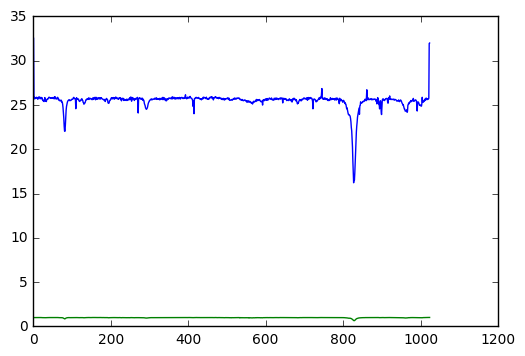

In [10]:
plt.plot(flux)
plt.plot(dracs_flux)
plt.show()

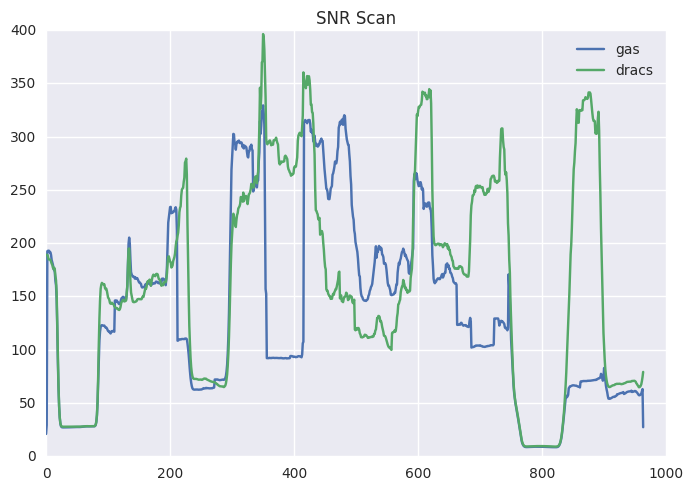

In [13]:
# TEst SNR
from snr_calculations import snrscan
frame = 60
snr_gas = snrscan(flux, frame)
snr_dracs = snrscan(dracs_flux, frame)

plt.plot(snr_gas, label="gas")
plt.plot(snr_dracs, label="dracs")
plt.title("SNR Scan")
plt.legend()
plt.show()